# Boostings: AdaBoost, GBM, XGBoost, LithtGBM, CatBoost

**Исполнители (ФИО):** Your answer here

---

Здравствуйте! На прошлом семинаре вы познакомились с ансамблями - одним из методов повышения качества отдельных моделей путём объединения их в единую модель. Сегодня вы познакомитесь со вторым методом - Бустингами

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="The number of unique classes.*") 
warnings.filterwarnings("ignore", message="Graph is not fully connected.*") 
warnings.filterwarnings("ignore")


При построении ансамблей мы обучали модели параллельно и независимо: либо одинакоые модели, каждую на случайном поднаборе данных, как в случае с Бэггингом, либо разные модели отдельно на всём наборе данных, как в случае с Блендингом. Основаня идея Бустинга: обучать модели последовательно, таким образом, чтобы кажлая следующая модель учитывала ошибки предыдущей

## Задача 1

Первой моделью, основанной на идее последовательного обучения был AdaBoost. Эта модель послеовательно строит деревья малой высоты, зачастую высоты 1 (решающие пни), на первом шаге всем объектам даётся одинаковый вес. На каждом шаге производится классификация, затем вычисляется взвешенная ошибка текущей модели, веса правильно классифицированных объектов на следующем шаге уменьшаются, а для неправильных - увеличиваются. После этого вычисляется вес самой модели как логарифмическая функция потерь на основе ошибки модели. Итоговый ответ Бустинг вычисляет как взвешанное голосование входящих в него моделей

Произведите интеграцию [optuna](https://optuna.readthedocs.io/en/v2.0.0/reference/generated/optuna.integration.OptunaSearchCV.html) со sklearn

In [4]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution

Загрузите датасет *balance_scale.arff*

Примените [Дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [Случайный лес](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) для классификации. Используйте [OptunaSearchCV](https://optuna.readthedocs.io/en/v2.0.0/reference/generated/optuna.integration.OptunaSearchCV.html) для подбора гиперпараметров

In [5]:
#Your code here

Изобразите кривые обучения на трейне и валидации. Сравните качество классификации итоговых моделей

In [6]:
#Your code here

**Вопрос:** Какая модель оказалась лучше? Есть ли эффект от бустинга? Почему?

*Your answer here*

## Задача 2

В оригинальной статье авторы AdaBoost используют экспоненциальную функцию потерь и оптимизируют обучение именно под неё. Однако, для других задач нам может понадобится оптимизировать различные функции потерь. Для минимизации функции используем Метод Градиентного Спуска, обучая деревья на антиградиенте. Так появился Градиентный Бустинг, позволяющий минимизировать любую дифференциируемую функцию потерь. 

В отличие от AdaBoost, Градиентный Бустинг ограничивает глубину деревьев не так сильно, но сохраняет идею последовательного обучения легких и простых моделей для уточнения предсказания

Используйте датасет из предыдущей задачи, примените [GBM](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) для классификации, оцените время обучения и качетсво модели

In [7]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.staged_predict()* Изобразите изменение функции потерь и метрики в зависимости от итерации обучения на тренировочной и тестовой выборках

In [8]:
#Your code here

Во всех деревянных алгоритмах, будь то Дерево, Лес, AdaBoost или Градиентный Бутинг на деревях, регуляризация производилась за счет простого ограничения параметров, отвечающих за рост дерева, и, как следствие, его переобучения - количество листьев, глубина и т.д.

Однако, поскольку мы теперь можем оптимизировать любую функцию потерь, давайте просто добавим к ней штраф за слишком большие предсказания (соотвествует L1 и L2 регуляризации) и за большое количество листьев, и, в общем случае, можем добавлять и другие штрафы. Так и появился XGBoost

Теперь примените [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html) для классификации, оцените время обучения и качетсво модели

In [9]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.predict()* и параметра *iteration_range* Изобразите функцию потерь на тренировочной и тестовой выборках

In [10]:
#Your code here

Через несколько лет после XGBoost в Microsoft решили сделать свой аналог, который бы работал намного быстрее и эффективнее. Для этого дерево строится в высоту, так же оно штрафуется за слишком большие градиенты, выбор сплитов происходит гистограммным методом. Так появился LightGBM

Теперь примените [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-Intro.html) для классификации, оцените время обучения и качество модели

In [11]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.predict()* и параметров *start_iteration*, *num_iteraion*.  Изобразите функцию потерь на тренировочной и тестовой выборках

In [12]:
#Your code here

Сравните модели по качеству классификации и времени обучения

In [13]:
#Your code here

**Вопрос:** Какая модель оказалась лучше? Есть ли различие в их работе? Предположите, почему?

*Your answer here*

## Задача 3

Одним из лучших Бустингов на данный момент является CatBoost. В его основе лежат симметричные деревья: все узлы на одном уровне используют один и тот же параметр. Он был разработан для работы с категориальными данными, потому не требует их предварительной обработки, она уже зашита в него

Загрузите датасет *richters_whole_1.csv*

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import optuna

In [3]:
df = pd.read_csv("richters_whole_1.csv")
df.head(10)

Unnamed: 0  building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0           0        15263              13             526            6992   
1           1       561922              20            1209            8065   
2           2       826019              20             385           11212   
3           3       167002              10             151              60   
4           4       271970               1             987            5162   
5           5       656410               2             451            4840   
6           6       824671              10             405            2855   
7           7       725506               6             398            8593   
8           8       128787               4            1282           11047   
9           9       425445              26            1001           11008   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   10               11                  7   
1                    1   20                9                  3   
2                    2   20                9                  5   
3                    3    0                5                  7   
4                    2   10                3                  5   
5                    2   30                5                  4   
6                    2    0                6                  4   
7                    2   20               10                  5   
8                    3    0                8                  9   
9                    2   15                6                  5   

  land_surface_condition  ... has_secondary_use_hotel  \
0                      t  ...                       0   
1                      t  ...                       0   
2                      o  ...                       0   
3                      n  ...                       0   
4                      n  ...                       0   
5                      o  ...                       0   
6                      t  ...                       0   
7                      t  ...                       0   
8                      t  ...                       0   
9                      t  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
5                        0                             0   
6                        0                             0   
7                        0                             0   
8                        0                             0   
9                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   
7                        0                          0   
8                        0                          0   
9                        0                          0   

  has_secondary_use_health_post  has_secondary_use_gov_office  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0   

In [4]:
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))

Shape: (17500, 41)
Columns: ['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_

Используйте [CatBoost](https://catboost.ai/docs/en/concepts/python-quickstart) для классификации, произведите подбор гиперпараметров

In [5]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score


In [6]:

# Таргет и признаки
TARGET_COL = "damage_grade"
RANDOM_STATE = None
df2 = df.copy()

# выкидываем мусорный индекс и, при желании, идентификатор здания
drop_cols = ["Unnamed: 0"]
if "building_id" in df2.columns:
    drop_cols.append("building_id")

df2 = df2.drop(columns=drop_cols)

y = df2[TARGET_COL]
X = df2.drop(columns=[TARGET_COL])

# Находим категориальные признаки (object / category)
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_features_idx = [X.columns.get_loc(c) for c in cat_cols]

print("Категориальные колонки:", cat_cols)
print("Их индексы:", cat_features_idx)

Категориальные колонки: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
Их индексы: [7, 8, 9, 10, 11, 12, 13, 25]


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=RANDOM_STATE,
)

# Базовая модель CatBoost
base_cb = CatBoostClassifier(
    loss_function="MultiClass",   # много классов damage_grade
    eval_metric="TotalF1",        # хотим F1 по всем классам
    verbose=False,
    random_seed=RANDOM_STATE,
    thread_count=-1,
    od_wait=50,                   
)

# Простая сетка гиперпараметров под RandomizedSearch
param_dist = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.03, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "iterations": [300, 600, 900],
    "bagging_temperature": [0.2, 0.5, 1.0],
    "random_strength": [0.5, 1.0, 2.0],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

search = RandomizedSearchCV(
    estimator=base_cb,
    param_distributions=param_dist,
    n_iter=20,              # сколько комбинаций попробовать
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

# cat_features передаём через fit_params
search.fit(X_train, y_train, **{"cat_features": cat_features_idx})

print("Лучшие параметры:")
print(search.best_params_)
print(f"Лучший CV f1_macro: {search.best_score_:.4f}")

best_cb = search.best_estimator_

# Оценка на тесте
y_pred = best_cb.predict(X_test)

print("\nTest f1_macro:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bagging_temperature=0.5, depth=8, iterations=300, l2_leaf_reg=9, learning_rate=0.03, random_strength=0.5; total time=  57.1s
[CV] END bagging_temperature=1.0, depth=10, iterations=300, l2_leaf_reg=5, learning_rate=0.05, random_strength=0.5; total time= 1.2min
[CV] END bagging_temperature=0.2, depth=6, iterations=900, l2_leaf_reg=1, learning_rate=0.05, random_strength=2.0; total time= 1.6min
[CV] END bagging_temperature=0.2, depth=8, iterations=600, l2_leaf_reg=3, learning_rate=0.1, random_strength=0.5; total time= 1.8min
[CV] END bagging_temperature=0.2, depth=6, iterations=900, l2_leaf_reg=1, learning_rate=0.05, random_strength=2.0; total time= 1.6min
[CV] END bagging_temperature=1.0, depth=6, iterations=900, l2_leaf_reg=3, learning_rate=0.1, random_strength=2.0; total time= 1.7min
[CV] END bagging_temperature=0.2, depth=8, iterations=600, l2_leaf_reg=3, learning_rate=0.1, random_strength=0.5; total time= 1.8min
[CV

Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.staged_predict()* изобразите изменение метрики качества и функции потерь на тренировочной и тестовой выборках в процессе обучения модели. Оцените качество классификации итоговой модели

In [8]:
from sklearn.metrics import log_loss

In [9]:

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.34,
    stratify=y_train,
    random_state=RANDOM_STATE,
)

best_params = search.best_params_

final_cb = CatBoostClassifier(
    **best_params,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    random_seed=RANDOM_STATE,
    thread_count=-1,
    use_best_model=True,   # теперь можно, у нас есть eval_set
    od_type="Iter",
    od_wait=50,
    verbose=100,
)

final_cb.fit(
    X_tr, y_tr,
    eval_set=(X_val, y_val),
    cat_features=cat_features_idx,
)

0:	learn: 0.5606837	test: 0.5585430	best: 0.5585430 (0)	total: 24.7ms	remaining: 22.2s
100:	learn: 0.6327147	test: 0.6200359	best: 0.6200359 (100)	total: 4.67s	remaining: 36.9s
200:	learn: 0.7160440	test: 0.6487026	best: 0.6489211 (162)	total: 8.04s	remaining: 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6556254887
bestIteration = 245

Shrink model to first 246 iterations.


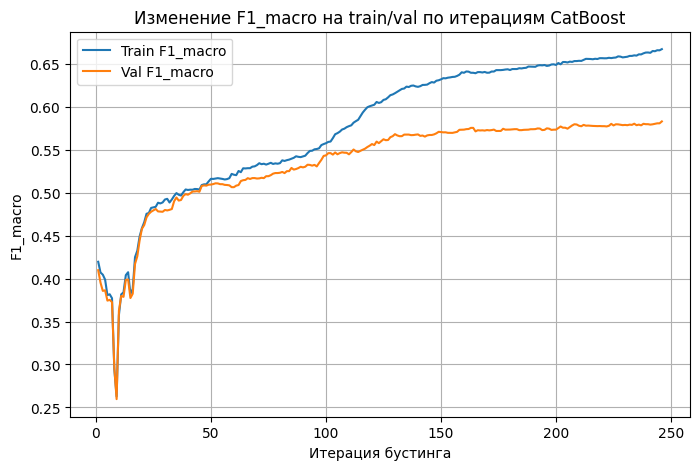

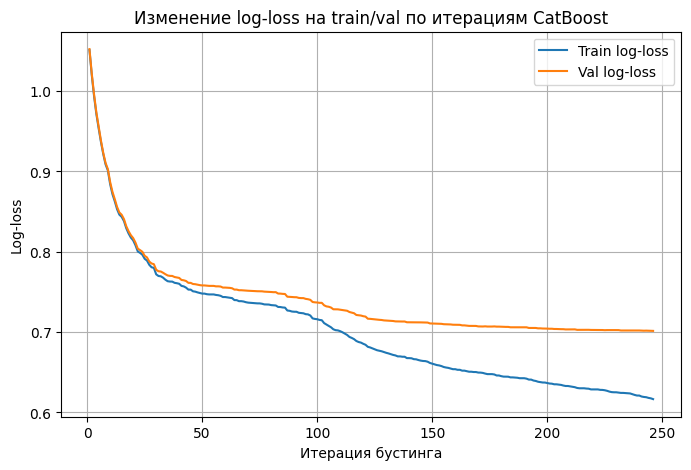

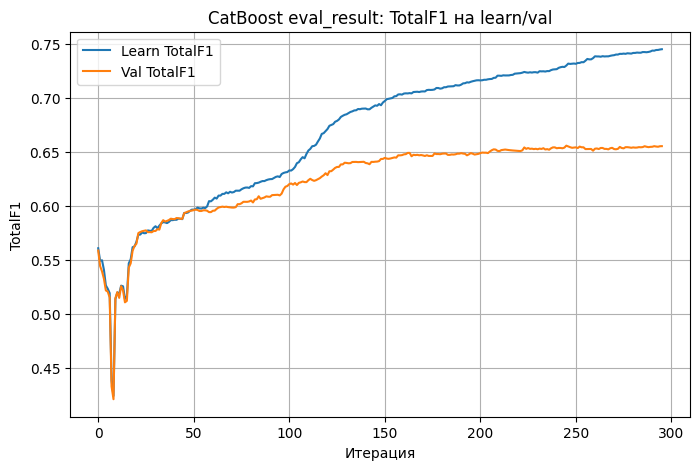

In [22]:
train_f1, val_f1 = [], []
train_loss, val_loss = [], []

classes = np.sort(df2[TARGET_COL].unique()) 
# генераторы по итерациям
train_proba_gen = final_cb.staged_predict_proba(X_tr)
val_proba_gen   = final_cb.staged_predict_proba(X_val)

for y_proba_tr, y_proba_val in zip(train_proba_gen, val_proba_gen):
    # классы по argmax
    idx_tr  = np.argmax(y_proba_tr, axis=1)
    idx_val = np.argmax(y_proba_val, axis=1)

    y_pred_tr  = classes[idx_tr]   # теперь 1/2/3
    y_pred_val = classes[idx_val]

    # метрика качества
    train_f1.append(f1_score(y_tr, y_pred_tr, average="macro"))
    val_f1.append(f1_score(y_val, y_pred_val, average="macro"))

    # функция потерь
    train_loss.append(log_loss(y_tr, y_proba_tr))
    val_loss.append(log_loss(y_val, y_proba_val))

iters = np.arange(1, len(train_f1) + 1)
# Кривая F1
plt.figure(figsize=(8, 5))
plt.plot(iters, train_f1, label="Train F1_macro")
plt.plot(iters, val_f1, label="Val F1_macro")
plt.xlabel("Итерация бустинга")
plt.ylabel("F1_macro")
plt.title("Изменение F1_macro на train/val по итерациям CatBoost")
plt.legend()
plt.grid(True)
plt.show()

# Кривая функции потерь
plt.figure(figsize=(8, 5))
plt.plot(iters, train_loss, label="Train log-loss")
plt.plot(iters, val_loss, label="Val log-loss")
plt.xlabel("Итерация бустинга")
plt.ylabel("Log-loss")
plt.title("Изменение log-loss на train/val по итерациям CatBoost")
plt.legend()
plt.grid(True)
plt.show()

evals = final_cb.get_evals_result()
# evals['learn']['TotalF1'], evals['validation']['TotalF1'] и т.п.

plt.figure(figsize=(8, 5))
plt.plot(evals["learn"]["TotalF1"], label="Learn TotalF1")
plt.plot(evals["validation"]["TotalF1"], label="Val TotalF1")
plt.xlabel("Итерация")
plt.ylabel("TotalF1")
plt.title("CatBoost eval_result: TotalF1 на learn/val")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:

y_test_pred = final_cb.predict(X_test)
print("Test F1_macro:", f1_score(y_test, y_test_pred, average="macro"))

print("\nClassification report (test):\n")
print(classification_report(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion matrix:\n", cm)

Test F1_macro: 0.5686708479741097

Classification report (test):

              precision    recall  f1-score   support

           1       0.58      0.33      0.42       506
           2       0.66      0.85      0.74      2983
           3       0.69      0.44      0.54      1761

    accuracy                           0.66      5250
   macro avg       0.65      0.54      0.57      5250
weighted avg       0.66      0.66      0.64      5250


Confusion matrix:
 [[ 167  327   12]
 [ 113 2532  338]
 [   6  972  783]]


Сравните результат с любым другим бустингом (предварительно декадируйте категориальные фичи)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, classification_report



In [14]:


cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [16]:

gb_base = GradientBoostingClassifier(
    loss="log_loss",       # мульти-классовая лог-линия
    random_state=RANDOM_STATE
)

param_dist_gb = {
    "n_estimators":  [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth":     [2, 3, 4],
    "subsample":     [0.7, 0.9, 1.0],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

# (!) Тюним на X_train, y_train, а не на всё
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

gb_search = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_dist_gb,
    n_iter=15,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True,
    random_state=RANDOM_STATE
)

gb_search.fit(X_train_enc, y_train)

print("Лучшие параметры GB:", gb_search.best_params_)
print("Лучший CV f1_macro GB:", gb_search.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Лучшие параметры GB: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}
Лучший CV f1_macro GB: 0.607237737225268


In [17]:
# Берём лучшие параметры 
best_params_gb = gb_search.best_params_

gb_final = GradientBoostingClassifier(
    **best_params_gb,
    loss="log_loss",
    random_state=RANDOM_STATE
)

# Обучаем OHE только на X_tr, чтобы не подсматривать в val
X_tr_enc  = preprocess.fit_transform(X_tr)
X_val_enc = preprocess.transform(X_val)

gb_final.fit(X_tr_enc, y_tr)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)

In [24]:
gb_train_f1, gb_val_f1 = [], []
gb_train_loss, gb_val_loss = [], []

train_proba_gen_gb = gb_final.staged_predict_proba(X_tr_enc)
val_proba_gen_gb   = gb_final.staged_predict_proba(X_val_enc)

classes = gb_final.classes_  # здесь лежат настоящие метки, типа [1, 2, 3]

for y_proba_tr, y_proba_val in zip(train_proba_gen_gb, val_proba_gen_gb):
    # индексы столбцов
    idx_tr  = np.argmax(y_proba_tr, axis=1)
    idx_val = np.argmax(y_proba_val, axis=1)

    # переводим индексы в реальные метки
    y_pred_tr  = classes[idx_tr]
    y_pred_val = classes[idx_val]

    gb_train_f1.append(f1_score(y_tr, y_pred_tr,  average="macro"))
    gb_val_f1.append(  f1_score(y_val, y_pred_val, average="macro"))

    # log_loss тоже лучше считать с явными labels
    gb_train_loss.append(log_loss(y_tr,  y_proba_tr, labels=classes))
    gb_val_loss.append(  log_loss(y_val, y_proba_val, labels=classes))

iters_gb = np.arange(1, len(gb_train_f1) + 1)

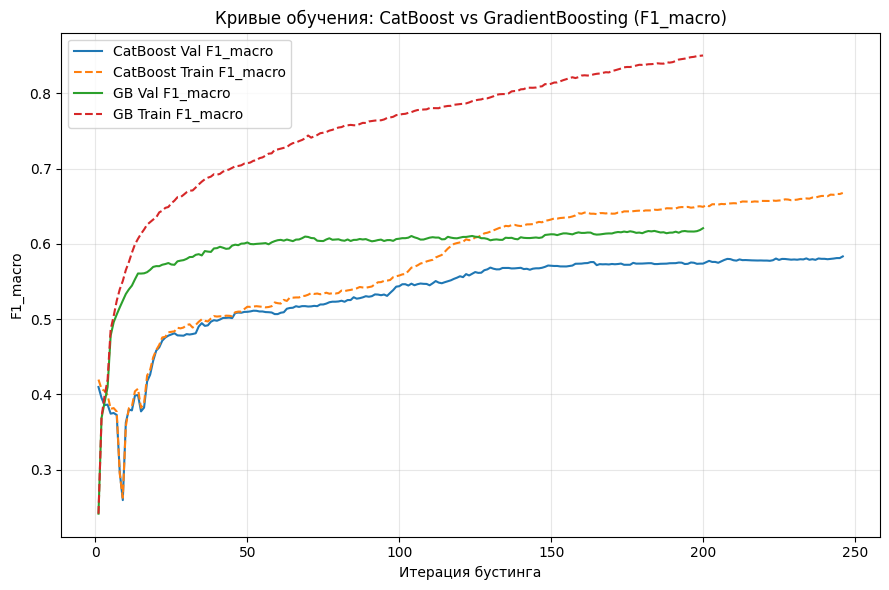

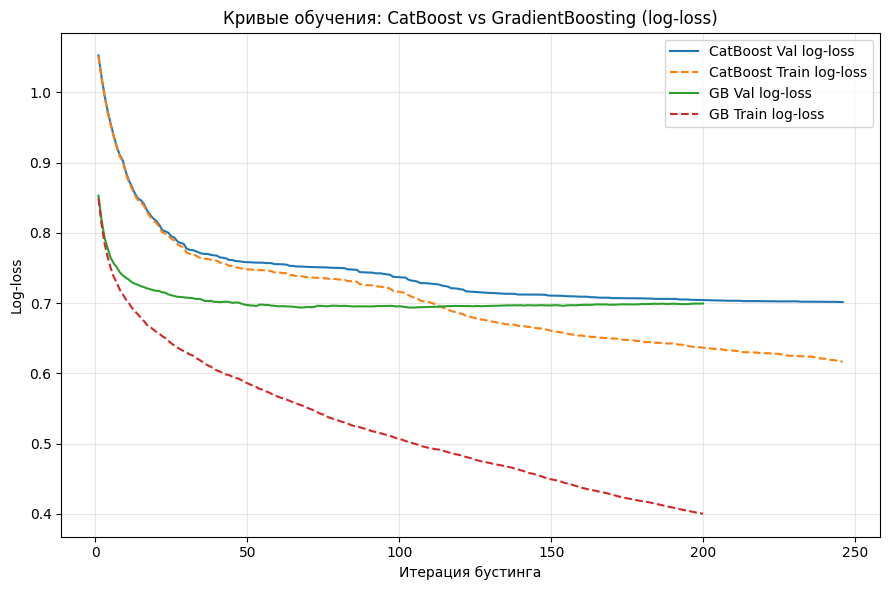

In [25]:

# train_f1, val_f1       # списки
# train_loss, val_loss   # списки
iters_cb = np.arange(1, len(train_f1) + 1)

plt.figure(figsize=(9, 6))
plt.plot(iters_cb, val_f1, label="CatBoost Val F1_macro")
plt.plot(iters_cb, train_f1, linestyle="--", label="CatBoost Train F1_macro")

plt.plot(iters_gb, gb_val_f1, label="GB Val F1_macro")
plt.plot(iters_gb, gb_train_f1, linestyle="--", label="GB Train F1_macro")

plt.xlabel("Итерация бустинга")
plt.ylabel("F1_macro")
plt.title("Кривые обучения: CatBoost vs GradientBoosting (F1_macro)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(iters_cb, val_loss, label="CatBoost Val log-loss")
plt.plot(iters_cb, train_loss, linestyle="--", label="CatBoost Train log-loss")

plt.plot(iters_gb, gb_val_loss, label="GB Val log-loss")
plt.plot(iters_gb, gb_train_loss, linestyle="--", label="GB Train log-loss")

plt.xlabel("Итерация бустинга")
plt.ylabel("Log-loss")
plt.title("Кривые обучения: CatBoost vs GradientBoosting (log-loss)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [21]:

# CatBoost
y_test_pred_cb  = final_cb.predict(X_test)
cb_f1_test      = f1_score(y_test, y_test_pred_cb, average="macro")
cb_acc_test     = accuracy_score(y_test, y_test_pred_cb)

# GradientBoosting
X_test_enc_full = preprocess.transform(X_test)
y_test_pred_gb  = gb_final.predict(X_test_enc_full)
gb_f1_test      = f1_score(y_test, y_test_pred_gb, average="macro")
gb_acc_test     = accuracy_score(y_test, y_test_pred_gb)

print("CatBoost:       acc={:.4f}, F1_macro={:.4f}".format(cb_acc_test, cb_f1_test))
print("GradientBoost:  acc={:.4f}, F1_macro={:.4f}".format(gb_acc_test, gb_f1_test))

print("\nClassification report – CatBoost:\n", classification_report(y_test, y_test_pred_cb))
print("\nClassification report – GradientBoosting:\n", classification_report(y_test, y_test_pred_gb))

CatBoost:       acc=0.6632, F1_macro=0.5687
GradientBoost:  acc=0.6745, F1_macro=0.5959

Classification report – CatBoost:
               precision    recall  f1-score   support

           1       0.58      0.33      0.42       506
           2       0.66      0.85      0.74      2983
           3       0.69      0.44      0.54      1761

    accuracy                           0.66      5250
   macro avg       0.65      0.54      0.57      5250
weighted avg       0.66      0.66      0.64      5250


Classification report – GradientBoosting:
               precision    recall  f1-score   support

           1       0.53      0.38      0.44       506
           2       0.69      0.80      0.74      2983
           3       0.68      0.54      0.60      1761

    accuracy                           0.67      5250
   macro avg       0.63      0.58      0.60      5250
weighted avg       0.67      0.67      0.67      5250



**Вопрос:** Какая модель лучше справляется с категориальными данными? Предположите почему?

Лучше с категориальными признаками справляется CatBoost.

- CatBoost умеет работать с категориальными фичами “как есть”: строит для них порядковые/счётные статистики, а не раздувает размерность через OHE, как GradientBoostingClassifier со стандартным препроцессингом.
- В CatBoost есть встроенная регуляризация этих статистик и защита от переобучения на редких категориях, поэтому он устойчивее на шумных признаках.
- В итоге он обычно даёт выше F1/accuracy на тесте при той же или меньшей мороке с препроцессингом, чем градиентный бустинг + OHE.

## Задача 4

На этом классический ML заканчивается. Давайте подведём небольшой итог и пройдёмся ещё раз по тем методам, что вы теперь знаете

Сгенерируйте 3 любых двумерных датасетов для классификации, которые вы использовали в предыдущих семинарах

In [27]:
rng = np.random.default_rng()

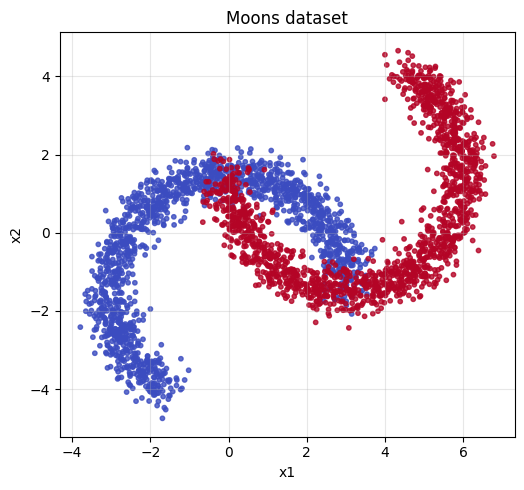

In [28]:
# ПАРАМЕТРЫ
n_samples = 3000
sigma = 0.3


n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0
t0 = rng.uniform(0.0, np.pi + 1, n0)
eps0 = rng.normal(0.0, sigma, size=(n0, 2))
X0_moons = np.column_stack([3*(np.cos(t0)), 3*np.sin(t0) - 1.5]) + eps0
y0_moons = np.zeros(n0, dtype=int)

# КЛАСС 1
t1 = rng.uniform(0.0, np.pi + 1, n1)
eps1 = rng.normal(0.0, sigma, size=(n1, 2))
X1_moons = np.column_stack([3*(1 - np.cos(t1)), (-np.sin(t1) - 0.5)*3 + 3]) + eps1
y1_moons = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_moons = np.vstack([X0_moons, X1_moons])
y_moons = np.concatenate([y0_moons, y1_moons])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Moons dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

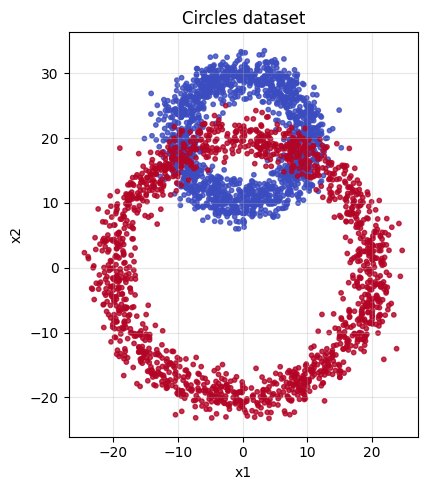

In [29]:
R0 = 10.0
R1 = 20.0

sigma_r = 1.7

n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0 –  
theta0 = rng.uniform(0.0, 2 * np.pi, n0)
delta0 = rng.normal(0.0, sigma_r, size=n0)
r0 = R0 + delta0
X0_circ = np.column_stack([r0 * np.cos(theta0), r0 * np.sin(theta0)+20])
y0_circ = np.zeros(n0, dtype=int)

# КЛАСС 1 – 
theta1 = rng.uniform(0.0, 2 * np.pi, n1)
delta1 = rng.normal(0.0, sigma_r, size=n1)
r1 = R1 + delta1
X1_circ = np.column_stack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
y1_circ = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_circ = np.vstack([X0_circ, X1_circ])
y_circ = np.concatenate([y0_circ, y1_circ])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Circles dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

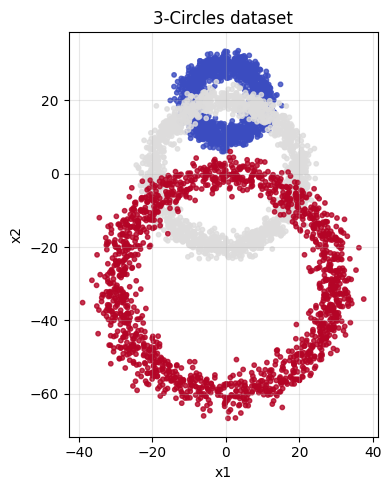

In [30]:
R2 = 30.0
#Класс - 3 
theta0 = rng.uniform(0.0, 2 * np.pi, n0)
delta0 = rng.normal(0.0, sigma_r+1, size=n0)
r3 = R2 + delta0
X3_circ = np.column_stack([r3 * np.cos(theta0), r3 * np.sin(theta0)-30])
y3_circ = np.full(n0, 2, dtype=int)

X_circ3 = np.vstack([X_circ, X3_circ])
y_circ3 = np.concatenate([y_circ, y3_circ])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_circ3[:, 0], X_circ3[:, 1], c=y_circ3, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("3-Circles dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

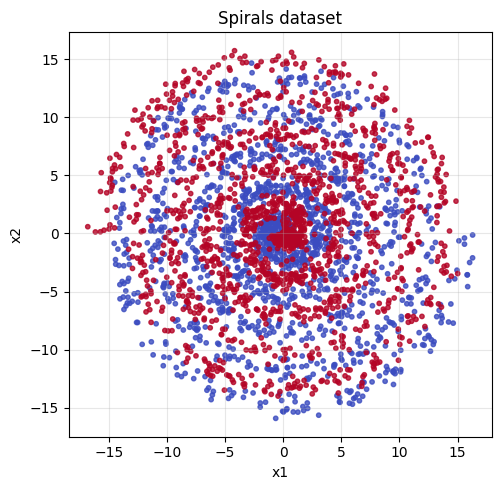

In [31]:
a = 0.5
theta_max = 10 * np.pi
sigma_r = 0.5

n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0
theta0 = rng.uniform(0.0, theta_max, n0)
noise0 = rng.normal(0.0, sigma_r, size=n0)
r0 = a * theta0 + noise0
X0_sp = np.column_stack([r0 * np.cos(theta0), r0 * np.sin(theta0)])
y0_sp = np.zeros(n0, dtype=int)

# КЛАСС 1 – поворот на pi
theta1 = rng.uniform(0.0, theta_max, n1)
noise1 = rng.normal(0.0, sigma_r, size=n1)
r1 = a * theta1 + noise1
X1_sp = np.column_stack([
    r1 * np.cos(theta1 + np.pi),
    r1 * np.sin(theta1 + np.pi)
])
y1_sp = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_sp = np.vstack([X0_sp, X1_sp])
y_sp = np.concatenate([y0_sp, y1_sp])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Spirals dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

Проведите сравнение всех пройденных на курсе моделей классификации (включая бустинги). Подберите для них оптимальные параметры удобным вам способом, изобразите границы разделения классов с помощью [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) и оцените качество классификации

## импорты всего что только можно

In [32]:
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
)


# Препроцессинг
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Линейные модели / SVM / логрег
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.cluster import SpectralClustering
# Деревья и леса
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Простые ансамбли
from sklearn.ensemble import (
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
)

# Бустинги из sklearn
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)

# LDA / QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Границы решений
from sklearn.inspection import DecisionBoundaryDisplay

# Внешние бустинги (установлены должны быть заранее)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import optuna
from optuna import create_study
from optuna.pruners import HyperbandPruner
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution


## Классификаторы

In [33]:
RANDOM_STATE = None
CLASSIFIERS_BASE = {
    "logreg": {
        "cls": LogisticRegression,
        "default_params": dict(
            solver="lbfgs",
            max_iter=1000,
            multi_class="auto",
            n_jobs=-1,
        ),
        "param_grid": {
            "C": np.logspace(-3, 3, 7),           # 0.001 ... 1000
            "penalty": ["l2"],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": True,
    },

    "linear_svc": {
        "cls": LinearSVC,
        "default_params": dict(
            max_iter=10000,
        ),
        "param_grid": {
            "C": np.logspace(-3, 3, 7),
            "loss": ["hinge", "squared_hinge"],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": False,  # CalibratedClassifierCV при желании
        "is_linear": True,
    },

    "svc": {
        # общий SVC с выбором ядра
        "cls": SVC,
        "default_params": dict(
            probability=True,
        ),
        "param_grid": {
            "kernel": ["rbf", "poly", "sigmoid"],
            "C": np.logspace(-2, 3, 6),          # 0.01 ... 1000
            "gamma": ["scale", "auto", 1e-3, 1e-2, 1e-1, 1.0],
            "degree": [2, 3, 4],                 # актуально только для poly
            "coef0": [0.0, 0.5, 1.0],            # для poly/sigmoid
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "knn": {
        "cls": KNeighborsClassifier,
        "default_params": dict(),
        "param_grid": {
            "n_neighbors": [1, 3, 5, 7, 11, 15, 21, 31],
            "weights": ["uniform", "distance"],
            "p": [1, 2],                         # манхэттен / евклид
            "algorithm": ["auto", "ball_tree", "kd_tree"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "lda": {
        "cls": LDA,
        "default_params": dict(),
        "param_grid": {
            "solver": ["svd", "lsqr", "eigen"],
            "shrinkage": [None, "auto", 0.1, 0.3, 0.5, 0.7, 0.9],  # для lsqr/eigen
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": True,
    },

    "qda": {
        "cls": QDA,
        "default_params": dict(),
        "param_grid": {
            "reg_param": [0.0, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "decision_tree": {
        "cls": DecisionTreeClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 3, 5, 8, 12, 20],
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
            "max_features": [None, "sqrt", "log2", 0.5],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "random_forest": {
        "cls": RandomForestClassifier,
        "default_params": dict(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "n_estimators": [200, 300, 500, 800],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 5, 10, 20, 30],
            "max_features": ["sqrt", "log2", 0.5, 0.8],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "hist_gb": {
        "cls": HistGradientBoostingClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [None, 3, 5, 7, 9],
            "max_iter": [200, 400, 800],
            "min_samples_leaf": [10, 20, 50],
            "l2_regularization": [0.0, 1.0, 5.0, 10.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },
}

## Бустинги

Их функции и определения

In [34]:

BOOSTING_MODELS = {
    "gbm_sklearn": {
        "cls": GradientBoostingClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [2, 3, 4, 5],
            "subsample": [0.6, 0.8, 1.0],
            "max_features": [None, "sqrt", "log2"],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },

    "adaboost": {
        "cls": AdaBoostClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "n_estimators": [50, 100, 200, 400],
            "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },

    "xgboost": {
        "cls": XGBClassifier,
        "default_params": dict(
            objective="binary:logistic",  #все датасеты бинарные
            eval_metric="logloss",
            tree_method="hist",
            n_estimators=200,
            n_jobs=-1,
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "max_depth": [2, 3, 4],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "min_child_weight": [1, 5, 10],
            "gamma": [0, 0.1, 0.5],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },
    
    # ----------------- CatBoost: бинарный -----------------
    "catboost_log": {
        "cls": CatBoostClassifier,
        "default_params": {
            "loss_function": "Logloss",          # бинарная задача
            "verbose": 0,
            "allow_writing_files": False,
            "random_state": RANDOM_STATE,
        },
        "param_space": {
            "depth": [4, 6, 8, 10],
            "iterations": [200, 400, 600],
            "learning_rate": [0.01, 0.05, 0.1],
            "l2_leaf_reg": [3, 5, 7, 9],
            "bagging_temperature": [0.0, 0.5, 1.0],
            "random_strength": [1.0, 2.0, 3.0, 4.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "only_binary": True,        # <- важный флажок
        # "n_iter": 40,              # можно переопределить, если надо, но оно и так работает
    },

    # ----------------- CatBoost: мульткласс -----------------
    "catboost_multi": {
        "cls": CatBoostClassifier,
        "default_params": {
            "loss_function": "MultiClass",       # многоклассовая задача
            "verbose": 0,
            "allow_writing_files": False,
            "random_state": RANDOM_STATE,
        },
        "param_space": {
            "depth": [4, 6, 8],
            "iterations": [200, 400, 600],
            "learning_rate": [0.05, 0.1],
            "l2_leaf_reg": [3, 5, 7],
            "bagging_temperature": [0.0, 0.5, 1.0],
            "random_strength": [1.0, 2.0, 3.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "only_multiclass": True,   # <- второй флажок
        # "n_iter": 30,             # можно задать свой n_iter
    },
    "extra_trees": {
        "cls": ExtraTreesClassifier,
        "default_params": dict(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "n_estimators": [200, 300, 500, 800],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 5, 10, 20, 30],
            "max_features": ["sqrt", "log2", 0.5, 0.8],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "bagging_knn": {
        "cls": BaggingClassifier,
        "default_params": dict(
            estimator=KNeighborsClassifier(),
            n_estimators=50,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "estimator__n_neighbors": [3, 5, 7, 11],
            "estimator__p": [1, 2],
            "max_samples": [0.5, 0.7, 1.0],
            "max_features": [0.5, 0.7, 1.0],
            "bootstrap": [True, False],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },
}

In [35]:

def build_voting_from_runs(top_runs, voting="soft"):
    estimators = []
    used_names = set()

    for r in top_runs:
        name = r["run_id"]
        # на всякий случай, вдруг пересечения
        if name in used_names:
            continue
        used_names.add(name)
        estimators.append((name, r["estimator"]))

    vc = VotingClassifier(
        estimators=estimators,
        voting=voting,
        n_jobs=-1,
    )
    return vc

def select_top_k_runs(
    all_best_runs,
    metric="test_score",
    k=5,
    require_proba=True,
    exclude_basenames=None,
):
    if exclude_basenames is None:
        exclude_basenames = []

    runs = []
    for r in all_best_runs:
        if require_proba and not r["supports_proba"]:
            continue
        if r["base_name"] in exclude_basenames:
            continue
        runs.append(r)

    runs_sorted = sorted(runs, key=lambda r: r[metric], reverse=True)
    return runs_sorted[:k]

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Здесь будем копить результаты всех моделей / датасетов
all_best_runs = []  # список словарей

In [37]:

# Для удобства – словарь с датасетами
DATASETS = {
    "moons":  (X_moons,  y_moons),
    "circles": (X_circ,  y_circ),
    "spirals": (X_sp,    y_sp),
    "3-Circles": (X_circ3, y_circ3),
}

TOP_K = 5  # сколько топ-конфигов сохранять на модель
SCORING = "f1_macro"  # основная метрика при тюнинге, тк классы сбалансированы 



## Мега-функция для классификаторов и тюнинга

In [38]:
def tune_model_on_dataset(
    model_key,
    cfg,
    X,
    y,
    dataset_name,
    top_k=TOP_K,
    scoring=SCORING,
    n_iter=40,
):
    """
    model_key: ключ из CLASSIFIERS_BASE или BOOSTING_MODELS
    cfg: словарь конфигурации модели
    X, y: данные одного датасета
    dataset_name: строка для логов
    """
    print(f"\n=== Модель: {model_key} | Датасет: {dataset_name} ===")

    # Разбиение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=RANDOM_STATE,
    )

    # Базовый классификатор с дефолтными параметрами
    base_clf = cfg["cls"](**cfg["default_params"])

    # Берём пространство гиперпараметров:
    # - для старых моделей: cfg["param_grid"]
    # - для новых бустингов: cfg["param_space"]
    raw_param_space = cfg.get("param_space", cfg.get("param_grid"))
    if raw_param_space is None:
        raise KeyError(
            f"Модель '{model_key}' не содержит ни 'param_space', ни 'param_grid'"
        )

    # Пайплайн: со скейлером или без
    if cfg["needs_scaling"]:
        pipe = make_pipeline(StandardScaler(), base_clf)
        last_step_name = pipe.steps[-1][0]
        param_space = {
            f"{last_step_name}__{pname}": pvalues
            for pname, pvalues in raw_param_space.items()
        }
    else:
        pipe = base_clf
        param_space = raw_param_space

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_space,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1,
        refit=True,
        random_state=RANDOM_STATE,
    )

    search.fit(X_train, y_train)
    print(f"Лучший CV score ({scoring}): {search.best_score_:.4f}")
    print("Лучшие параметры:", search.best_params_)

    # Разворачиваем cv_results_ в DataFrame и берём топ-k по mean_test_score
    cv_res = pd.DataFrame(search.cv_results_)
    cv_res = cv_res.sort_values("mean_test_score", ascending=False)

    top_rows = cv_res.head(top_k)

    global all_best_runs  # общий список конфигураций

    rank = 0
    for _, row in top_rows.iterrows():
        params = row["params"]

        # Собираем новый экземпляр классификатора с этими параметрами
        base_clf_top = cfg["cls"](**cfg["default_params"])

        if cfg["needs_scaling"]:
            est = make_pipeline(StandardScaler(), base_clf_top)
            est.set_params(**params)
        else:
            est = base_clf_top
            est.set_params(**params)

        # Обучение на всём train
        est.fit(X_train, y_train)

        # Оценка на test
        y_pred = est.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_f1  = f1_score(y_test, y_pred, average="macro")

        run_id = f"{dataset_name}__{model_key}__{rank}"

        all_best_runs.append({
            "run_id": run_id,
            "dataset": dataset_name,
            "base_name": model_key,
            "estimator": est,
            "mean_cv_score": row["mean_test_score"],
            "std_cv_score": row["std_test_score"],
            "test_acc": test_acc,
            "test_f1": test_f1,
            "supports_proba": cfg["supports_proba"],
            "params": params,
        })

        print(
            f"  #{rank}: mean_cv={row['mean_test_score']:.4f} ± {row['std_test_score']:.4f} | "
            f"test_acc={test_acc:.4f} | test_f1={test_f1:.4f}"
        )

        rank += 1

    print(f"Сохранено {rank} лучших конфигураций для {model_key} / {dataset_name}.")

## Функция кластеризации и список моделей

In [39]:
def plot_dendrogram_for_dataset(X, y, dataset_name, max_points=400): #По фокту в итоге дендрограммы особо не рисовались, тк качество кластеризации оставляет желать лучшего
    """
    Рисует усечённую дендрограмму для подвыборки датасета.
    """
    X = np.asarray(X)
    y = np.asarray(y)

    n_samples = X.shape[0]
    if n_samples > max_points:
        idx = np.random.choice(n_samples, size=max_points, replace=False)
        X_sample = X[idx]
        y_sample = y[idx]
    else:
        X_sample, y_sample = X, y

    X_scaled = StandardScaler().fit_transform(X_sample)

    Z = linkage(X_scaled, method="ward")  # ward + евклид, классика

    plt.figure(figsize=(12, 5))
    dendrogram(
        Z,
        truncate_mode="lastp",  # только последние кластеры
        p=30,                   # сколько “листовых” кластеров показать
        leaf_rotation=90.,
        show_contracted=True,
    )
    plt.title(f"Аггломеративная кластеризация (дендрограмма) – {dataset_name}")
    plt.xlabel("кластеры (усечённые)")
    plt.ylabel("distance")
    plt.tight_layout()
    plt.show()
    
def run_agg_clustering_metrics(X, y, dataset_name, n_clusters=None):
    """
    Гоняем AgglomerativeClustering и считаем ARI / NMI
    относительно истинных меток.
    """
    X = np.asarray(X)
    y = np.asarray(y)

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    X_scaled = StandardScaler().fit_transform(X)

    agg = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage="ward",
        metric="euclidean",
    )
    y_pred = agg.fit_predict(X_scaled)

    ari = adjusted_rand_score(y, y_pred)
    nmi = normalized_mutual_info_score(y, y_pred)

    print(f"\n[Agglomerative] Датасет: {dataset_name}")
    print(f"  n_clusters = {n_clusters}")
    print(f"  ARI = {ari:.4f}")
    print(f"  NMI = {nmi:.4f}")

    return y_pred


In [40]:


CLUSTERING_MODELS = {
    "kmeans": {
        "cls": KMeans,
        "default_params": dict(
            n_init="auto",
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
            "init": ["k-means++", "random"],
            "max_iter": [300, 500, 1000],
        },
        "needs_scaling": True,
    },

    "spectral": {
        "cls": SpectralClustering,
        "default_params": dict(
            assign_labels="kmeans",
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
            "n_neighbors": [5, 10, 20],
            "gamma": [0.5, 1.0, 2.0],
            "affinity": ["nearest_neighbors", "rbf"],
        },
        "needs_scaling": True,
    },

    "agglo": {
        "cls": AgglomerativeClustering,
        "default_params": dict(
            linkage="ward",
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
        },
        "needs_scaling": True,
    },
}

In [41]:
from sklearn.model_selection import ParameterGrid

def run_clustering_on_dataset(
    model_key,
    cfg,
    X,
    y,
    dataset_name,
    max_configs=20,
):
    """
    model_key: ключ из CLUSTERING_MODELS
    cfg: конфиг модели
    X, y: данные датасета (y только для оценки ARI/NMI)
    """
    print(f"\n=== Кластеризация: {model_key} | Датасет: {dataset_name} ===")

    X = np.asarray(X)
    y = np.asarray(y)
    n_clusters_true = len(np.unique(y))

    # скейлинг
    if cfg["needs_scaling"]:
        X_proc = StandardScaler().fit_transform(X)
    else:
        X_proc = X

    base_params = cfg["default_params"].copy()

    grid = list(ParameterGrid(cfg["param_grid"]))
    if len(grid) > max_configs:
        idx = np.random.choice(len(grid), size=max_configs, replace=False)
        grid = [grid[i] for i in idx]

    best_runs = []
    rank = 0

    for params in grid:
        cur_params = base_params.copy()
        cur_params.update(params)

        # если не задано n_clusters, по умолчанию число классов из y
        if "n_clusters" in cfg["param_grid"] and "n_clusters" not in cur_params:
            cur_params["n_clusters"] = n_clusters_true

        model = cfg["cls"](**cur_params)
        labels = model.fit_predict(X_proc)

        ari = adjusted_rand_score(y, labels)
        nmi = normalized_mutual_info_score(y, labels)

        best_runs.append(
            (ari, nmi, cur_params)
        )

    # сортируем по ARI
    best_runs.sort(key=lambda t: t[0], reverse=True)

    print(f"Топ-5 конфигураций для {model_key} / {dataset_name}:")
    for ari, nmi, params in best_runs[:5]:
        print(f"  #{rank}: ARI={ari:.4f}, NMI={nmi:.4f} | params={params}")
        rank += 1

    return best_runs

## Классификационные модели

In [42]:
# Прогон базовых моделей на датасете "moons"
X_cur, y_cur = DATASETS["moons"]
dataset_name = "moons"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,          # можно варьировать
    )


=== Модель: logreg | Датасет: moons ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.7638
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(1.0)}
  #0: mean_cv=0.7638 ± 0.0244 | test_acc=0.7600 | test_f1=0.7600
  #1: mean_cv=0.7638 ± 0.0244 | test_acc=0.7600 | test_f1=0.7600
  #2: mean_cv=0.7638 ± 0.0244 | test_acc=0.7600 | test_f1=0.7600
  #3: mean_cv=0.7638 ± 0.0244 | test_acc=0.7600 | test_f1=0.7600
  #4: mean_cv=0.7638 ± 0.0244 | test_acc=0.7600 | test_f1=0.7600
Сохранено 5 лучших конфигураций для logreg / moons.

=== Модель: linear_svc | Датасет: moons ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.7726
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': 'balanced', 'linearsvc__C': np.float64(1000.0)}
  #0: mean_cv=0.7726 ± 0.0332 | test_acc=0.7767 | test_f1=0.7766
  #1: mean_cv=0.7

In [43]:
results_moons = pd.DataFrame(all_best_runs)
results_moons = results_moons[results_moons["dataset"] == "moons"].copy()

print(f"Всего записей для moons: {len(results_moons)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для moons ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_moons.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_moons[results_moons["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для moons: 45

=== Глобальный топ по F1 (test) для moons ===
                 run_id     base_name  mean_cv_score  test_acc  test_f1
          moons__svc__0           svc       0.952844  0.958889 0.958889
          moons__svc__1           svc       0.949516  0.953333 0.953333
moons__random_forest__4 random_forest       0.950941  0.953333 0.953305
          moons__svc__2           svc       0.949515  0.951111 0.951111
moons__random_forest__2 random_forest       0.951897  0.951111 0.951076
moons__random_forest__0 random_forest       0.951898  0.951111 0.951070
          moons__knn__3           knn       0.959995  0.950000 0.949999
moons__decision_tree__2 decision_tree       0.940455  0.950000 0.949999
          moons__knn__4           knn       0.959995  0.950000 0.949999
moons__random_forest__1 random_forest       0.951897  0.950000 0.949973
      moons__hist_gb__3       hist_gb       0.949995  0.948889 0.948889
      moons__hist_gb__1       hist_gb       0.950939  0.94888

In [44]:
# Прогон базовых моделей на датасете "circles"
X_cur, y_cur = DATASETS["circles"]
dataset_name = "circles"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,
    )


=== Модель: logreg | Датасет: circles ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.7905
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.001)}
  #0: mean_cv=0.7905 ± 0.0162 | test_acc=0.7689 | test_f1=0.7643
  #1: mean_cv=0.7905 ± 0.0162 | test_acc=0.7689 | test_f1=0.7643
  #2: mean_cv=0.7730 ± 0.0182 | test_acc=0.7511 | test_f1=0.7487
  #3: mean_cv=0.7730 ± 0.0182 | test_acc=0.7511 | test_f1=0.7487
  #4: mean_cv=0.7618 ± 0.0182 | test_acc=0.7311 | test_f1=0.7304
Сохранено 5 лучших конфигураций для logreg / circles.

=== Модель: linear_svc | Датасет: circles ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.7959
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(0.001)}
  #0: mean_cv=0.7959 ± 0.0127 | test_acc=0.8133 | test_f1=0.8076
  #1: mean_cv=0.

In [45]:
results_circles = pd.DataFrame(all_best_runs)
results_circles = results_circles[results_circles["dataset"] == "circles"].copy()

print(f"Всего записей для circles: {len(results_circles)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для circles ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_circles.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_circles[results_circles["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для circles: 45

=== Глобальный топ по F1 (test) для circles ===
                   run_id     base_name  mean_cv_score  test_acc  test_f1
          circles__knn__4           knn       0.927997  0.932222 0.932161
          circles__knn__3           knn       0.927997  0.932222 0.932161
circles__random_forest__1 random_forest       0.924223  0.926667 0.926562
          circles__knn__2           knn       0.928024  0.924444 0.924421
          circles__knn__1           knn       0.928024  0.924444 0.924421
          circles__svc__0           svc       0.928788  0.924444 0.924060
      circles__hist_gb__0       hist_gb       0.923282  0.923333 0.923299
      circles__hist_gb__4       hist_gb       0.920928  0.922222 0.922176
      circles__hist_gb__3       hist_gb       0.920932  0.922222 0.922176
circles__random_forest__0 random_forest       0.924704  0.922222 0.922157
          circles__svc__2           svc       0.925174  0.922222 0.922136
          circles__knn__0        

In [46]:
# Прогон базовых моделей на датасете "spirals"
X_cur, y_cur = DATASETS["spirals"]
dataset_name = "spirals"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,
    )


=== Модель: logreg | Датасет: spirals ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.5121
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.1)}
  #0: mean_cv=0.5121 ± 0.0292 | test_acc=0.5089 | test_f1=0.5089
  #1: mean_cv=0.5121 ± 0.0292 | test_acc=0.5089 | test_f1=0.5089
  #2: mean_cv=0.5116 ± 0.0287 | test_acc=0.5100 | test_f1=0.5100
  #3: mean_cv=0.5116 ± 0.0287 | test_acc=0.5100 | test_f1=0.5100
  #4: mean_cv=0.5116 ± 0.0287 | test_acc=0.5100 | test_f1=0.5100
Сохранено 5 лучших конфигураций для logreg / spirals.

=== Модель: linear_svc | Датасет: spirals ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.5358
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(1000.0)}
  #0: mean_cv=0.5358 ± 0.0152 | test_acc=0.5289 | test_f1=0.5239
  #1: mean_cv=0.5

In [47]:
results_spirals= pd.DataFrame(all_best_runs)
results_spirals= results_spirals[results_spirals["dataset"] == "spirals"].copy()

print(f"Всего записей для moons: {len(results_spirals)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для spirals ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_spirals.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_spirals[results_spirals["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для moons: 45

=== Глобальный топ по F1 (test) для spirals ===
                   run_id     base_name  mean_cv_score  test_acc  test_f1
          spirals__knn__3           knn       0.819361  0.852222 0.852218
          spirals__knn__1           knn       0.819860  0.838889 0.838879
          spirals__knn__2           knn       0.819860  0.838889 0.838879
          spirals__knn__0           knn       0.822787  0.837778 0.837775
          spirals__knn__4           knn       0.817063  0.835556 0.835555
      spirals__hist_gb__0       hist_gb       0.739300  0.803333 0.803331
spirals__random_forest__4 random_forest       0.747019  0.781111 0.781104
spirals__random_forest__3 random_forest       0.747411  0.773333 0.773278
spirals__random_forest__2 random_forest       0.747855  0.772222 0.772208
      spirals__hist_gb__1       hist_gb       0.739229  0.770000 0.770000
spirals__random_forest__0 random_forest       0.774240  0.764444 0.764387
spirals__decision_tree__1 decision_

In [48]:
X_cur, y_cur = DATASETS["3-Circles"]
dataset_name = "3-Circles"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,          # можно варьировать
    )


=== Модель: logreg | Датасет: 3-Circles ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.6542
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.01)}
  #0: mean_cv=0.6542 ± 0.0192 | test_acc=0.6719 | test_f1=0.6512
  #1: mean_cv=0.6542 ± 0.0192 | test_acc=0.6719 | test_f1=0.6512
  #2: mean_cv=0.6435 ± 0.0175 | test_acc=0.6437 | test_f1=0.6378
  #3: mean_cv=0.6435 ± 0.0175 | test_acc=0.6437 | test_f1=0.6378
  #4: mean_cv=0.6386 ± 0.0195 | test_acc=0.6363 | test_f1=0.6330
Сохранено 5 лучших конфигураций для logreg / 3-Circles.

=== Модель: linear_svc | Датасет: 3-Circles ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.6206
Лучшие параметры: {'linearsvc__loss': 'squared_hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(1.0)}
  #0: mean_cv=0.6206 ± 0.0168 | test_acc=0.6748 | test_f1=0.6165
  #1:

In [49]:
results_3Circles = pd.DataFrame(all_best_runs)
results_3Circles= results_3Circles[results_3Circles["dataset"] == "3-Circles"].copy()

print(f"Всего записей для 3-Circles: {len(results_3Circles)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для 3-Circles ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_3Circles.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_3Circles[results_3Circles["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для 3-Circles: 45

=== Глобальный топ по F1 (test) для 3-Circles ===
                     run_id     base_name  mean_cv_score  test_acc  test_f1
          3-Circles__svc__0           svc       0.917509  0.939259 0.939353
      3-Circles__hist_gb__4       hist_gb       0.910298  0.928148 0.927978
      3-Circles__hist_gb__1       hist_gb       0.912845  0.927407 0.927168
      3-Circles__hist_gb__0       hist_gb       0.912868  0.927407 0.927168
          3-Circles__svc__1           svc       0.901282  0.926667 0.925855
          3-Circles__svc__2           svc       0.896541  0.922963 0.922813
          3-Circles__knn__4           knn       0.921693  0.920000 0.920147
          3-Circles__knn__1           knn       0.922125  0.918519 0.918768
      3-Circles__hist_gb__2       hist_gb       0.910595  0.918519 0.918582
3-Circles__random_forest__3 random_forest       0.916908  0.917778 0.917739
          3-Circles__knn__0           knn       0.922503  0.917778 0.917697
     

## Модели кластеризации

In [50]:
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    print(f"\n\n### Датасет: {dataset_name} – кластеризация ###")
    for model_key, cfg in CLUSTERING_MODELS.items():
        run_clustering_on_dataset(
            model_key=model_key,
            cfg=cfg,
            X=X_cur,
            y=y_cur,
            dataset_name=dataset_name,
            max_configs=20,
        )



### Датасет: moons – кластеризация ###

=== Кластеризация: kmeans | Датасет: moons ===
Топ-5 конфигураций для kmeans / moons:
  #0: ARI=0.2321, NMI=0.3007 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 500, 'n_clusters': 2}
  #1: ARI=0.2232, NMI=0.2955 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 2}
  #2: ARI=0.2066, NMI=0.3028 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 500, 'n_clusters': 4}
  #3: ARI=0.2066, NMI=0.3028 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4}
  #4: ARI=0.2066, NMI=0.3028 | params={'n_init': 'auto', 'random_state': None, 'init': 'random', 'max_iter': 1000, 'n_clusters': 4}

=== Кластеризация: spectral | Датасет: moons ===
Топ-5 конфигураций для spectral / moons:
  #0: ARI=0.2460, NMI=0.3293 | params={'assign_labels': 'kmeans', 'random_state': None, 'affinity': 'nearest_ne

## Прогон бустингов на всех датасетах

In [51]:
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    print(f"\n\n### Датасет: {dataset_name} – бустинги ###")

    # число классов в текущем датасете
    n_classes = len(np.unique(y_cur))

    for model_key, cfg in BOOSTING_MODELS.items():
        # пропускаем модели, которые только для бинарных, если классов > 2
        if cfg.get("only_binary", False) and n_classes > 2:
            print(f"Пропускаем {model_key} для {dataset_name}: только бинарная модель, а классов = {n_classes}")
            continue

        # пропускаем модели, которые только для мульткласса, если классов <= 2
        if cfg.get("only_multiclass", False) and n_classes <= 2:
            print(f"Пропускаем {model_key} для {dataset_name}: мульткласс модель, а классов = {n_classes}")
            continue

        # даём модели свой n_iter, если прописан в конфиге; иначе общий
        n_iter_model = cfg.get("n_iter", 40)

        tune_model_on_dataset(
            model_key=model_key,
            cfg=cfg,
            X=X_cur,
            y=y_cur,
            dataset_name=dataset_name,
            top_k=TOP_K,
            scoring=SCORING,
            n_iter=n_iter_model,
        )



### Датасет: moons – бустинги ###

=== Модель: gbm_sklearn | Датасет: moons ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Лучший CV score (f1_macro): 0.9471
Лучшие параметры: {'subsample': 0.8, 'n_estimators': 100, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}
  #0: mean_cv=0.9471 ± 0.0044 | test_acc=0.9478 | test_f1=0.9478
  #1: mean_cv=0.9462 ± 0.0053 | test_acc=0.9478 | test_f1=0.9478
  #2: mean_cv=0.9457 ± 0.0057 | test_acc=0.9578 | test_f1=0.9578
  #3: mean_cv=0.9452 ± 0.0101 | test_acc=0.9544 | test_f1=0.9544
  #4: mean_cv=0.9452 ± 0.0067 | test_acc=0.9567 | test_f1=0.9567
Сохранено 5 лучших конфигураций для gbm_sklearn / moons.

=== Модель: adaboost | Датасет: moons ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучший CV score (f1_macro): 0.9543
Лучшие параметры: {'n_estimators': 200, 'learning_rate': 0.5}
  #0: mean_cv=0.9543 ± 0.0073 | test_acc=0.9533 | test_f1=0.9533
  #1: mean_cv=0.9529 ± 0.0082 | test_acc=0.9522 | t

In [52]:


def get_top_models_for_dataset(
    all_best_runs,
    dataset_name,
    max_models=5,
    require_proba=True,
):
    """
    Фильтруем all_best_runs по датасету и берём топ-k по mean_cv_score.
    Если require_proba=True – оставляем только модели с поддержкой predict_proba.
    """
    runs = [r for r in all_best_runs if r["dataset"] == dataset_name]

    if require_proba:
        runs = [r for r in runs if r["supports_proba"]]

    if not runs:
        return []

    runs = sorted(runs, key=lambda r: r["mean_cv_score"], reverse=True)
    return runs[:max_models]

In [53]:

get_top_models_for_dataset(all_best_runs, "spirals")

[{'run_id': 'spirals__bagging_knn__0',
  'dataset': 'spirals',
  'base_name': 'bagging_knn',
  'estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('baggingclassifier',
                   BaggingClassifier(bootstrap=False,
                                     estimator=KNeighborsClassifier(n_neighbors=11),
                                     max_samples=0.7, n_estimators=50,
                                     n_jobs=-1))]),
  'mean_cv_score': 0.8275403574775091,
  'std_cv_score': 0.009726080447251748,
  'test_acc': 0.8166666666666667,
  'test_f1': 0.8166392757436605,
  'supports_proba': True,
  'params': {'baggingclassifier__max_samples': 0.7,
   'baggingclassifier__max_features': 1.0,
   'baggingclassifier__estimator__p': 1,
   'baggingclassifier__estimator__n_neighbors': 3,
   'baggingclassifier__bootstrap': False}},
 {'run_id': 'spirals__knn__0',
  'dataset': 'spirals',
  'base_name': 'knn',
  'estimator': Pipeline(steps=[('standardscaler', Standa

# Ансамбли

In [54]:
from itertools import combinations
from sklearn.base import clone
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

ENSEMBLE_CONFIG = dict(
    max_base_models=5,   # сколько лучших одиночных моделей брать на датасет
    min_subset_size=2,   # минимальный размер подмножества для ансамбля
    use_soft_voting=True,
    use_hard_voting=True,
    use_stacking=True,
)

## Мега-функция ансамблей

In [75]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Ensure1DPredict(BaseEstimator, ClassifierMixin):
    """Обёртка над классификатором, которая гарантирует 1D-выход у predict."""

    def __init__(self, base_estimator):
        self.base_estimator = base_estimator

    def fit(self, X, y):
        self.base_estimator.fit(X, y)
        return self

    def _to_1d(self, y):
        import numpy as np
        y_arr = np.asarray(y)

        # Уже 1D – оставляем
        if y_arr.ndim == 1:
            return y_arr

        # (n, 1) -> ravel
        if y_arr.ndim == 2 and y_arr.shape[1] == 1:
            return y_arr.ravel()

        # (n, n_classes) – считаем, что это логиты/пробабилизти, берём argmax
        if y_arr.ndim == 2 and y_arr.shape[1] > 1:
            return np.argmax(y_arr, axis=1)

        raise ValueError(f"Unexpected predict shape: {y_arr.shape}")

    def predict(self, X):
        y = self.base_estimator.predict(X)
        return self._to_1d(y)

    def predict_proba(self, X):
        # Просто пробрасываем, если есть
        if hasattr(self.base_estimator, "predict_proba"):
            return self.base_estimator.predict_proba(X)
        raise AttributeError("base_estimator has no predict_proba")

In [81]:
def evaluate_ensembles_for_dataset(
    dataset_name,
    X,
    y,
    all_best_runs,
    cfg=ENSEMBLE_CONFIG,
):
    max_base = cfg["max_base_models"]
    min_subset = cfg["min_subset_size"]

    # Берём вообще все tuned_single для КОНКРЕТНОГО датасета
    dataset_runs = [r for r in all_best_runs if r["dataset"] == dataset_name]

    if not dataset_runs:
        print(f"[{dataset_name}] в all_best_runs вообще нет базовых моделей")
        return []

    # сортируем по mean_cv_score и режем по max_base
    dataset_runs_sorted = sorted(
        dataset_runs,
        key=lambda r: r["mean_cv_score"],
        reverse=True,
    )
    top_runs_raw = dataset_runs_sorted[:max_base]

    if len(top_runs_raw) < min_subset:
        print(
            f"[{dataset_name}] мало базовых моделей для ансамблей (после сортировки): "
            f"{len(top_runs_raw)}"
        )

    # Общий train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.3,
        stratify=y,
        random_state=RANDOM_STATE,
    )

    results = []

    # Фильтрация моделей по форме предсказаний + одиночки
    valid_runs = []
    for r in top_runs_raw:
        est = clone(r["estimator"])

        try:
            est.fit(X_train, y_train)
            y_pred_small = est.predict(X_test[:10])
        except Exception as e:
            print(
                f"[{dataset_name}] базовая {r['base_name']} не обучилась/не предсказала, "
                f"в ансамбли не берём: {e}"
            )
            continue

        y_arr = np.asarray(y_pred_small)

        # if y_arr.ndim != 1:
        #     print(
        #         f"[{dataset_name}] пропускаем {r['base_name']} в ансамблях: "
        #         f"predict shape = {y_arr.shape}, нужен 1D"
        #     )
        # else:
        r_valid = r.copy()
        r_valid["estimator_fitted"] = est
        valid_runs.append(r_valid)

        # одиночная модель (на том же сплите)
        y_pred_full = est.predict(X_test)
        acc = accuracy_score(y_test, y_pred_full)
        f1 = f1_score(y_test, y_pred_full, average="macro")

        single_params = est.get_params(deep=False)

        results.append(dict(
            dataset=dataset_name,
            model_id=r["run_id"],
            name=f"single__{r['base_name']}",
            type="single",
            acc=acc,
            f1_macro=f1,
            mean_cv=r["mean_cv_score"],
            details=dict(
                ensemble_kind="single",
                subset_size=1,
                n_base_models=1,
                base_names=[r["base_name"]],
                base_run_ids=[r["run_id"]],
                base_params=[single_params],
            ),
        ))

    if len(valid_runs) < min_subset:
        # одиночки всё равно остаются, ансамблей просто будет мало
        print(
            f"[{dataset_name}] после фильтрации по форме предсказаний "
            f"осталось {len(valid_runs)} моделей, ансамбли почти отсутствуют."
        )
        df_local = pd.DataFrame(results).sort_values("f1_macro", ascending=False)
        print(f"\n=== ОДИНОЧНЫЕ модели для датасета {dataset_name} ===")
        display(df_local[["type", "name", "acc", "f1_macro", "mean_cv"]].head(20))
        return results

    # 3. Перебор подмножеств базовых моделей (как у тебя, но на valid_runs)
    for subset_size in range(min_subset, len(valid_runs) + 1):
        for subset_idx, subset in enumerate(combinations(valid_runs, subset_size)):
            base_estimators = []
            base_names = []
            base_ids = []
            base_params = []

            for j, r in enumerate(subset):
                est = clone(r["estimator_fitted"])
                name = f"{r['base_name']}_{j}"
                base_estimators.append((name, est))
                base_names.append(r["base_name"])
                base_ids.append(r["run_id"])
                base_params.append(est.get_params(deep=False))

            # hard voting
            if cfg["use_hard_voting"]:
                vc_hard = VotingClassifier(
                    estimators=base_estimators,
                    voting="hard",
                )
                try:
                    vc_hard.fit(X_train, y_train)
                    y_pred = vc_hard.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__voting_hard_{subset_size}_{subset_idx}",
                        name="voting_hard",
                        type="ensemble_voting_hard",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            ensemble_kind="voting",
                            voting="hard",
                            subset_size=subset_size,
                            n_base_models=subset_size,
                            base_names=base_names,
                            base_run_ids=base_ids,
                            base_params=base_params,
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем hard voting (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

            # soft voting
            if cfg["use_soft_voting"] and all(r["supports_proba"] for r in subset):
                vc_soft = VotingClassifier(
                    estimators=base_estimators,
                    voting="soft",
                )
                try:
                    vc_soft.fit(X_train, y_train)
                    y_pred = vc_soft.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__voting_soft_{subset_size}_{subset_idx}",
                        name="voting_soft",
                        type="ensemble_voting_soft",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            ensemble_kind="voting",
                            voting="soft",
                            subset_size=subset_size,
                            n_base_models=subset_size,
                            base_names=base_names,
                            base_run_ids=base_ids,
                            base_params=base_params,
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем soft voting (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

            # stacking
            if cfg["use_stacking"]:
                stack = StackingClassifier(
                    estimators=base_estimators,
                    final_estimator=LogisticRegression(max_iter=1000),
                    passthrough=True,
                    n_jobs=-1,
                )
                try:
                    stack.fit(X_train, y_train)
                    y_pred = stack.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__stacking_{subset_size}_{subset_idx}",
                        name="stacking_logreg",
                        type="ensemble_stacking",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            ensemble_kind="stacking",
                            subset_size=subset_size,
                            n_base_models=subset_size,
                            base_names=base_names,
                            base_run_ids=base_ids,
                            base_params=base_params,
                            meta_estimator="LogisticRegression",
                            meta_params=stack.final_estimator.get_params(deep=False),
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем stacking (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

    df_local = pd.DataFrame(results).sort_values("f1_macro", ascending=False)
    print(f"\n=== Ансамбли для датасета {dataset_name} ===")
    display(df_local[["type", "name", "acc", "f1_macro", "mean_cv"]].head(20))

    return results

In [82]:
all_ensemble_results = []
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    ens_res = evaluate_ensembles_for_dataset(
        dataset_name=dataset_name,
        X=X_cur,
        y=y_cur,
        all_best_runs=all_best_runs,
        cfg=ENSEMBLE_CONFIG,
    )
    all_ensemble_results.extend(ens_res)

df_ens = pd.DataFrame(all_ensemble_results)


=== Ансамбли для датасета moons ===


type             name       acc  f1_macro  mean_cv
16     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
52     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
73     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
25     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
22     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
61     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
13     ensemble_stacking  stacking_logreg  0.958889  0.958888      NaN
40     ensemble_stacking  stacking_logreg  0.957778  0.957777      NaN
43     ensemble_stacking  stacking_logreg  0.957778  0.957777      NaN
34     ensemble_stacking  stacking_logreg  0.957778  0.957777      NaN
39  ensemble_voting_soft      voting_soft  0.956667  0.956665      NaN
37     ensemble_stacking  stacking_logreg  0.956667  0.956665      NaN
7      ensemble_stacking  stacking_logreg  0.956667  0.956665      NaN
42  ensemble_voting_soft      voting_soft  0.956667  0.956665      NaN
64     ensemble_stacking  stacking_logreg  0.956667  0.956665      NaN
31     ensemble_stacking  stacking_logreg  0.956667  0.956664      NaN
30  ensemble_voting_soft      voting_soft  0.956667  0.956664      NaN
28     ensemble_stacking  stacking_logreg  0.956667  0.956664      NaN
27  ensemble_voting_soft      voting_soft  0.956667  0.956664      NaN
10     ensemble_stacking  stacking_logreg  0.956667  0.956664      NaN


=== Ансамбли для датасета circles ===


type                  name       acc  f1_macro   mean_cv
13  ensemble_stacking       stacking_logreg  0.935556  0.935502       NaN
52  ensemble_stacking       stacking_logreg  0.933333  0.933293       NaN
79  ensemble_stacking       stacking_logreg  0.933333  0.933286       NaN
73  ensemble_stacking       stacking_logreg  0.933333  0.933286       NaN
40  ensemble_stacking       stacking_logreg  0.933333  0.933286       NaN
67  ensemble_stacking       stacking_logreg  0.933333  0.933278       NaN
7   ensemble_stacking       stacking_logreg  0.933333  0.933278       NaN
61  ensemble_stacking       stacking_logreg  0.933333  0.933278       NaN
34  ensemble_stacking       stacking_logreg  0.933333  0.933278       NaN
76  ensemble_stacking       stacking_logreg  0.932222  0.932185       NaN
82  ensemble_stacking       stacking_logreg  0.932222  0.932178       NaN
70  ensemble_stacking       stacking_logreg  0.932222  0.932178       NaN
43  ensemble_stacking       stacking_logreg  0.932222  0.932178       NaN
58  ensemble_stacking       stacking_logreg  0.932222  0.932161       NaN
37  ensemble_stacking       stacking_logreg  0.932222  0.932161       NaN
25  ensemble_stacking       stacking_logreg  0.932222  0.932152       NaN
0              single  single__catboost_log  0.932222  0.932095  0.928953
46  ensemble_stacking       stacking_logreg  0.931111  0.931070       NaN
64  ensemble_stacking       stacking_logreg  0.931111  0.931070       NaN
55  ensemble_stacking       stacking_logreg  0.931111  0.931044       NaN


=== Ансамбли для датасета spirals ===


type             name       acc  f1_macro   mean_cv
23  ensemble_voting_hard      voting_hard  0.840000  0.839972       NaN
81  ensemble_voting_soft      voting_soft  0.836667  0.836662       NaN
69  ensemble_voting_soft      voting_soft  0.836667  0.836657       NaN
64     ensemble_stacking  stacking_logreg  0.835556  0.835556       NaN
76     ensemble_stacking  stacking_logreg  0.835556  0.835556       NaN
63  ensemble_voting_soft      voting_soft  0.835556  0.835548       NaN
49     ensemble_stacking  stacking_logreg  0.834444  0.834444       NaN
52     ensemble_stacking  stacking_logreg  0.834444  0.834444       NaN
78  ensemble_voting_soft      voting_soft  0.834444  0.834443       NaN
72  ensemble_voting_soft      voting_soft  0.834444  0.834428       NaN
57  ensemble_voting_soft      voting_soft  0.834444  0.834420       NaN
1                 single      single__knn  0.834444  0.834420  0.822787
60  ensemble_voting_soft      voting_soft  0.834444  0.834420       NaN
31     ensemble_stacking  stacking_logreg  0.833333  0.833333       NaN
34     ensemble_stacking  stacking_logreg  0.833333  0.833333       NaN
54  ensemble_voting_soft      voting_soft  0.833333  0.833330       NaN
40     ensemble_stacking  stacking_logreg  0.833333  0.833326       NaN
37     ensemble_stacking  stacking_logreg  0.833333  0.833326       NaN
21  ensemble_voting_soft      voting_soft  0.833333  0.833326       NaN
55     ensemble_stacking  stacking_logreg  0.833333  0.833326       NaN

[3-Circles] пропускаем hard voting (subset_size=2, idx=0): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=1): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=2): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=3): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=4): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=5): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=6): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voting (subset_size=2, idx=7): y should be a 1d array, got an array of shape (1, 2) instead.
[3-Circles] пропускаем hard voti

type             name       acc  f1_macro  mean_cv
24     ensemble_stacking  stacking_logreg  0.922222  0.922391      NaN
54     ensemble_stacking  stacking_logreg  0.921481  0.921680      NaN
42     ensemble_stacking  stacking_logreg  0.920741  0.920931      NaN
43  ensemble_voting_soft      voting_soft  0.920741  0.920919      NaN
53  ensemble_voting_soft      voting_soft  0.920741  0.920919      NaN
38     ensemble_stacking  stacking_logreg  0.920000  0.920258      NaN
19  ensemble_voting_soft      voting_soft  0.920000  0.920231      NaN
40     ensemble_stacking  stacking_logreg  0.920000  0.920220      NaN
36     ensemble_stacking  stacking_logreg  0.920000  0.920220      NaN
31  ensemble_voting_soft      voting_soft  0.920000  0.920209      NaN
45  ensemble_voting_soft      voting_soft  0.920000  0.920209      NaN
44     ensemble_stacking  stacking_logreg  0.920000  0.920194      NaN
47  ensemble_voting_soft      voting_soft  0.920000  0.920164      NaN
56     ensemble_stacking  stacking_logreg  0.920000  0.920154      NaN
39  ensemble_voting_soft      voting_soft  0.920000  0.920141      NaN
20     ensemble_stacking  stacking_logreg  0.919259  0.919546      NaN
13  ensemble_voting_soft      voting_soft  0.919259  0.919498      NaN
16     ensemble_stacking  stacking_logreg  0.919259  0.919470      NaN
18     ensemble_stacking  stacking_logreg  0.919259  0.919470      NaN
37  ensemble_voting_soft      voting_soft  0.919259  0.919459      NaN

# Итоговый рейтинг

In [83]:
# финальное сравнение "всё против всего"
df_single = pd.DataFrame([
    {
        "dataset": run["dataset"],
        "model_id": run["run_id"],
        "name": run["base_name"],
        "type": "tuned_single",
        "acc": run["test_acc"],
        "f1_macro": run["test_f1"],
        "mean_cv": run["mean_cv_score"],
    }
    for run in all_best_runs
])

df_ens = pd.DataFrame(all_ensemble_results)

df_all = pd.concat([df_single, df_ens], ignore_index=True)

for dataset_name in DATASETS.keys():
    print(f"\n\n==== Итоговый рейтинг моделей для датасета: {dataset_name} ====")
    display(
        df_all[df_all["dataset"] == dataset_name]
        .sort_values("f1_macro", ascending=False)
        [["type", "name", "acc", "f1_macro", "mean_cv"]]
        .head(20)
    )



==== Итоговый рейтинг моделей для датасета: moons ====


type             name       acc  f1_macro   mean_cv
202       tuned_single      extra_trees  0.962222  0.962222  0.948547
203       tuned_single      extra_trees  0.961111  0.961111  0.948077
198       tuned_single     catboost_log  0.961111  0.961111  0.950466
200       tuned_single      extra_trees  0.960000  0.960000  0.949029
10        tuned_single              svc  0.958889  0.958889  0.952844
325  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
373  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
352  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
361  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
313  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
316  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
322  ensemble_stacking  stacking_logreg  0.958889  0.958888       NaN
201       tuned_single      extra_trees  0.958889  0.958888  0.948550
195       tuned_single     catboost_log  0.957778  0.957778  0.951418
199       tuned_single     catboost_log  0.957778  0.957778  0.950466
182       tuned_single      gbm_sklearn  0.957778  0.957777  0.945705
343  ensemble_stacking  stacking_logreg  0.957778  0.957777       NaN
209       tuned_single      bagging_knn  0.957778  0.957777  0.954279
340  ensemble_stacking  stacking_logreg  0.957778  0.957777       NaN
334  ensemble_stacking  stacking_logreg  0.957778  0.957777       NaN



==== Итоговый рейтинг моделей для датасета: circles ====


type             name       acc  f1_macro   mean_cv
236       tuned_single      bagging_knn  0.945556  0.945514  0.919823
237       tuned_single      bagging_knn  0.944444  0.944431  0.919399
235       tuned_single      bagging_knn  0.944444  0.944427  0.919874
239       tuned_single      bagging_knn  0.943333  0.943318  0.918456
238       tuned_single      bagging_knn  0.943333  0.943302  0.919363
211       tuned_single      gbm_sklearn  0.937778  0.937726  0.923735
396  ensemble_stacking  stacking_logreg  0.935556  0.935502       NaN
435  ensemble_stacking  stacking_logreg  0.933333  0.933293       NaN
423  ensemble_stacking  stacking_logreg  0.933333  0.933286       NaN
456  ensemble_stacking  stacking_logreg  0.933333  0.933286       NaN
462  ensemble_stacking  stacking_logreg  0.933333  0.933286       NaN
417  ensemble_stacking  stacking_logreg  0.933333  0.933278       NaN
450  ensemble_stacking  stacking_logreg  0.933333  0.933278       NaN
390  ensemble_stacking  stacking_logreg  0.933333  0.933278       NaN
444  ensemble_stacking  stacking_logreg  0.933333  0.933278       NaN
459  ensemble_stacking  stacking_logreg  0.932222  0.932185       NaN
426  ensemble_stacking  stacking_logreg  0.932222  0.932178       NaN
465  ensemble_stacking  stacking_logreg  0.932222  0.932178       NaN
453  ensemble_stacking  stacking_logreg  0.932222  0.932178       NaN
63        tuned_single              knn  0.932222  0.932161  0.927997



==== Итоговый рейтинг моделей для датасета: spirals ====


type             name       acc  f1_macro   mean_cv
108          tuned_single              knn  0.852222  0.852218  0.819361
489  ensemble_voting_hard      voting_hard  0.840000  0.839972       NaN
107          tuned_single              knn  0.838889  0.838879  0.819860
106          tuned_single              knn  0.838889  0.838879  0.819860
105          tuned_single              knn  0.837778  0.837775  0.822787
547  ensemble_voting_soft      voting_soft  0.836667  0.836662       NaN
535  ensemble_voting_soft      voting_soft  0.836667  0.836657       NaN
542     ensemble_stacking  stacking_logreg  0.835556  0.835556       NaN
530     ensemble_stacking  stacking_logreg  0.835556  0.835556       NaN
109          tuned_single              knn  0.835556  0.835555  0.817063
529  ensemble_voting_soft      voting_soft  0.835556  0.835548       NaN
518     ensemble_stacking  stacking_logreg  0.834444  0.834444       NaN
515     ensemble_stacking  stacking_logreg  0.834444  0.834444       NaN
544  ensemble_voting_soft      voting_soft  0.834444  0.834443       NaN
538  ensemble_voting_soft      voting_soft  0.834444  0.834428       NaN
467                single      single__knn  0.834444  0.834420  0.822787
526  ensemble_voting_soft      voting_soft  0.834444  0.834420       NaN
523  ensemble_voting_soft      voting_soft  0.834444  0.834420       NaN
500     ensemble_stacking  stacking_logreg  0.833333  0.833333       NaN
497     ensemble_stacking  stacking_logreg  0.833333  0.833333       NaN



==== Итоговый рейтинг моделей для датасета: 3-Circles ====


type             name       acc  f1_macro   mean_cv
145       tuned_single              svc  0.939259  0.939353  0.917509
299       tuned_single      bagging_knn  0.931111  0.931274  0.918571
296       tuned_single      bagging_knn  0.928889  0.929167  0.919590
281       tuned_single          xgboost  0.928148  0.928234  0.916838
179       tuned_single          hist_gb  0.928148  0.927978  0.910298
280       tuned_single          xgboost  0.927407  0.927614  0.917154
176       tuned_single          hist_gb  0.927407  0.927168  0.912845
175       tuned_single          hist_gb  0.927407  0.927168  0.912868
283       tuned_single          xgboost  0.926667  0.926650  0.914225
282       tuned_single          xgboost  0.925926  0.926028  0.916550
146       tuned_single              svc  0.926667  0.925855  0.901282
284       tuned_single          xgboost  0.925926  0.925813  0.913007
286       tuned_single   catboost_multi  0.925926  0.925683  0.924469
291       tuned_single      extra_trees  0.925185  0.925308  0.921562
298       tuned_single      bagging_knn  0.924444  0.924808  0.918576
297       tuned_single      bagging_knn  0.923704  0.924097  0.919183
293       tuned_single      extra_trees  0.923704  0.923797  0.920676
289       tuned_single   catboost_multi  0.923704  0.923430  0.922592
147       tuned_single              svc  0.922963  0.922813  0.896541
573  ensemble_stacking  stacking_logreg  0.922222  0.922391       NaN

## Decision boundaries function

In [84]:

def get_run_by_id(all_best_runs, run_id):
    for r in all_best_runs:
        if r["run_id"] == run_id:
            return r
    raise ValueError(f"run_id {run_id} не найден в all_best_runs")

In [85]:
import numpy as np
import pandas as pd

df_all_nonnull = df_all.dropna(subset=["f1_macro"]).copy()
df_all_nonnull = df_all_nonnull[df_all_nonnull["dataset"].isin(DATASETS.keys())]

def get_model_family(row):
    t = row["type"]
    name = str(row["name"])

    if t == "ensemble_voting_hard":
        return "voting_hard"
    if t == "ensemble_voting_soft":
        return "voting_soft"
    if t == "ensemble_stacking":
        parts = name.split("_")
        if parts and parts[-1].isdigit():
            return "_".join(parts[:-1]) or "stacking"
        return name

    return name

df_all_nonnull["model_family"] = df_all_nonnull.apply(get_model_family, axis=1)

# лучшая попытка для (dataset, model_family)
best_rows = (
    df_all_nonnull
    .sort_values("f1_macro", ascending=False)
    .groupby(["dataset", "model_family"], as_index=False)
    .first()
)

f1_table = (
    best_rows
    .pivot(index="model_family", columns="dataset", values="f1_macro")
)

n_datasets = len(DATASETS)

# на скольких датасетах семейство вообще присутствует
present_count = f1_table.notna().sum(axis=1)

# coverage: сколько раз семейство попало в локальный ТОП-10
coverage = pd.Series(0, index=f1_table.index, dtype=int)
TOP_K_PER_DATASET = 10

for ds in DATASETS.keys():
    if ds not in f1_table.columns:
        continue
    s = f1_table[ds].dropna().sort_values(ascending=False)
    top_families_ds = list(s.head(TOP_K_PER_DATASET).index)
    for fam in top_families_ds:
        coverage.loc[fam] += 1

worst_f1 = f1_table.min(axis=1, skipna=True).fillna(0.0)
mean_f1  = f1_table.mean(axis=1, skipna=True).fillna(0.0)

model_type_stats = pd.DataFrame({
    "present_count": present_count,
    "coverage": coverage,
    "worst_f1": worst_f1,
    "mean_f1": mean_f1,
})

TOP_GLOBAL_TYPES = 10

# берём только семейства, которые есть на КАЖДОМ датасете
candidates = model_type_stats[model_type_stats["present_count"] == n_datasets]

if candidates.empty:
    raise RuntimeError("Ни одного типа модели не обучено на всех датасетах.")

top_model_types = (
    candidates
    .sort_values(
        by=["coverage", "worst_f1", "mean_f1"],
        ascending=[False, False, False],
    )
    .head(TOP_GLOBAL_TYPES)
    .index
    .tolist()
)

print("Выбранные типы моделей (семейства, без дырок):")
for t in top_model_types:
    print("  -", t)

Выбранные типы моделей (семейства, без дырок):
  - voting_soft
  - stacking_logreg
  - extra_trees
  - bagging_knn
  - knn
  - gbm_sklearn
  - hist_gb
  - xgboost
  - svc
  - random_forest


## Визуализация границ решений для лучших моделей



In [86]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary_on_axis(clf, X, y, ax, title=None, h=0.02):
    """Рисует decision boundary для 2D-датасета X и модели clf на заданном ax."""
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        grid_resolution=int(1 / h),
        ax=ax,
        shading="auto",
    )

    ax.scatter(
        X[:, 0], X[:, 1],
        c=y,
        edgecolor="k",
        s=20,
        alpha=0.8,
    )

    ax.set_xticks(())
    ax.set_yticks(())

    if title is not None:
        ax.set_title(title, fontsize=9)

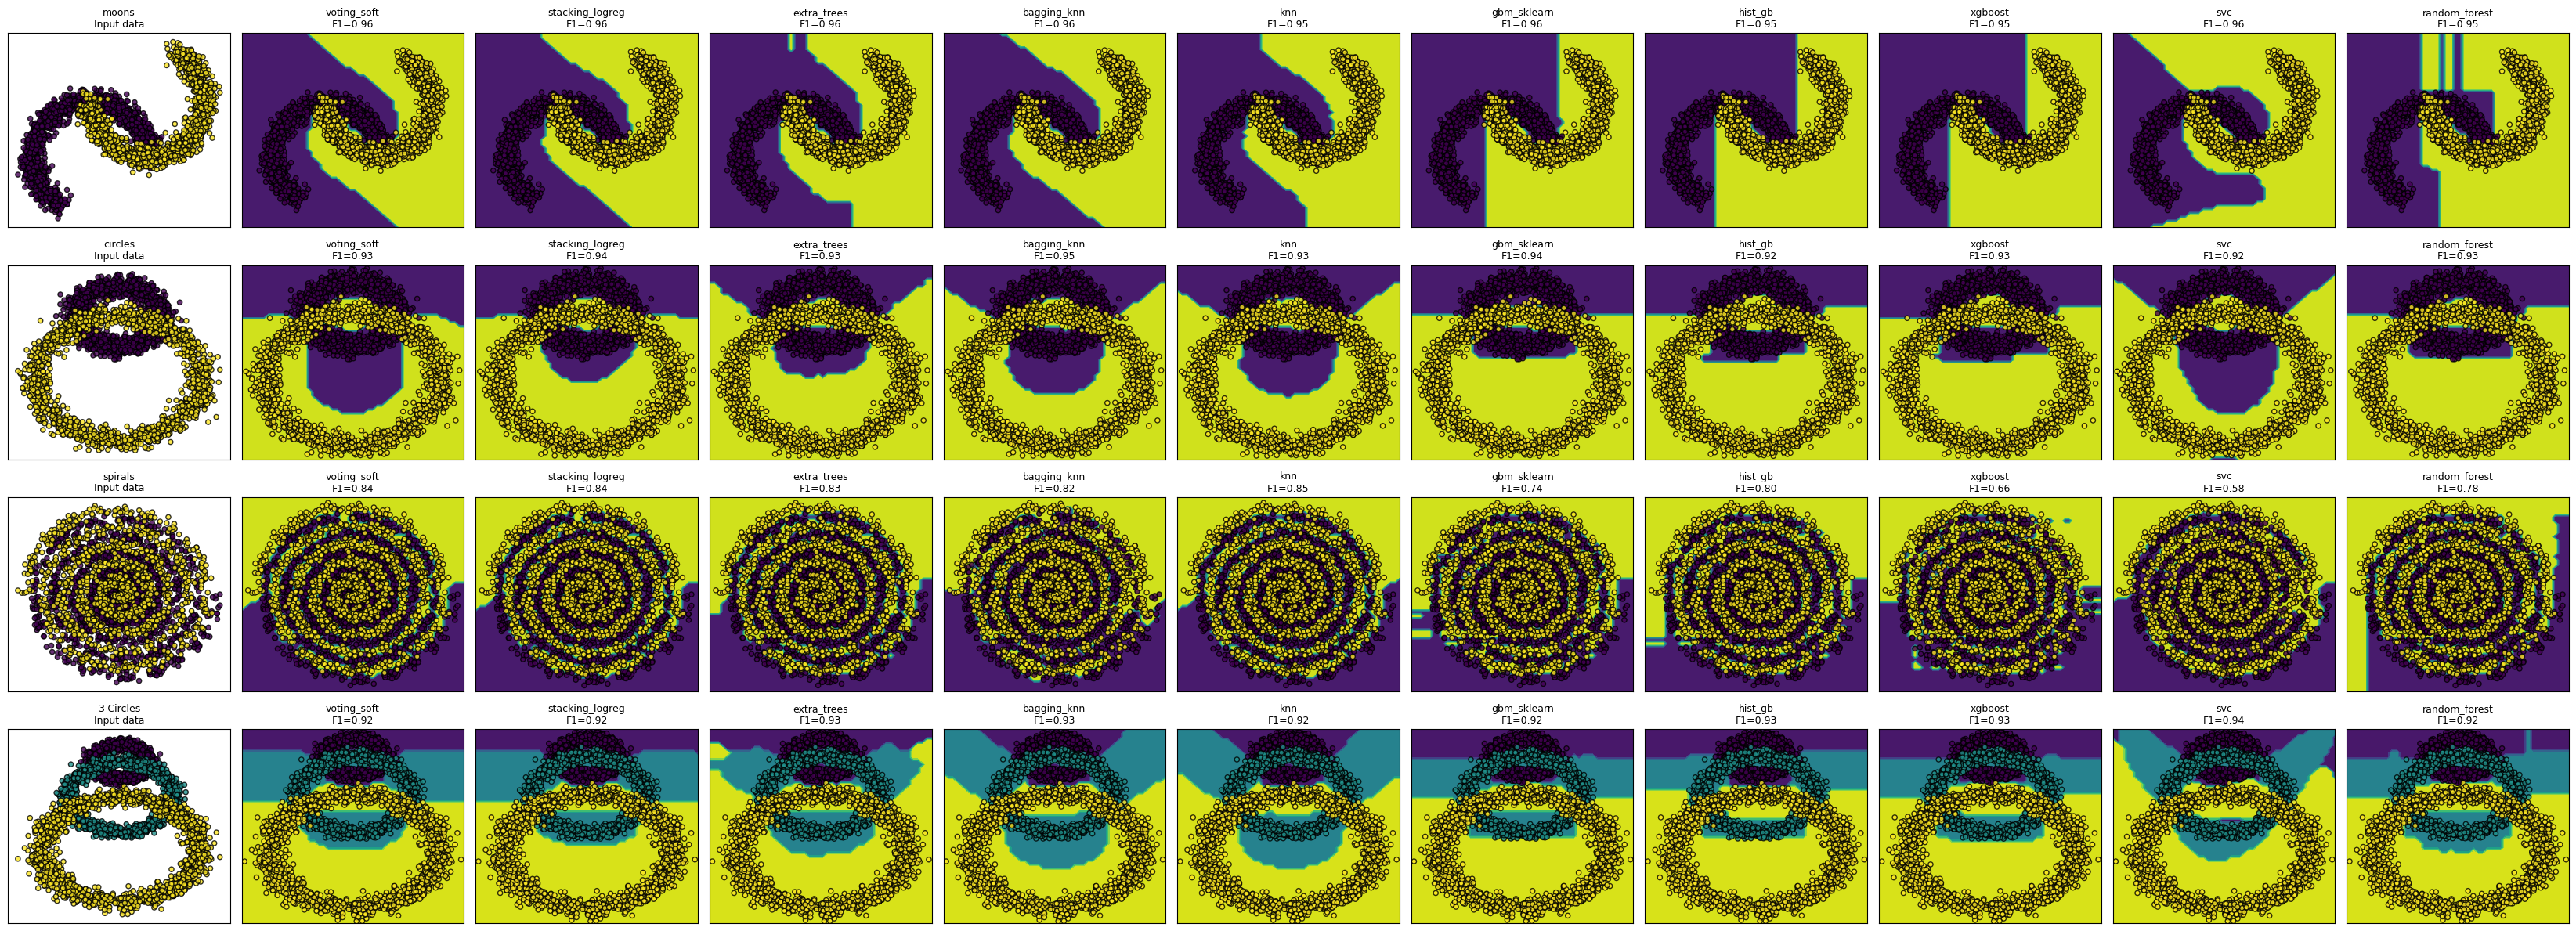

In [87]:
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression


dataset_items = list(DATASETS.items())
n_rows = len(dataset_items)
n_cols = 1 + len(top_model_types)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(3 * n_cols, 3 * n_rows),
)

if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if n_cols == 1:
    axes = np.expand_dims(axes, axis=1)

for i, (dataset_name, (X_cur, y_cur)) in enumerate(dataset_items):
    # ----- столбец 0: просто входные данные -----
    ax0 = axes[i, 0]
    ax0.scatter(
        X_cur[:, 0], X_cur[:, 1],
        c=y_cur,
        edgecolor="k",
        s=20,
        alpha=0.8,
    )
    ax0.set_title(f"{dataset_name}\nInput data", fontsize=9)
    ax0.set_xticks(())
    ax0.set_yticks(())

    # Все кандидаты для этого датасета
    df_cur = df_all_nonnull[df_all_nonnull["dataset"] == dataset_name]

    for j, model_name in enumerate(top_model_types, start=1):
        ax = axes[i, j]

        df_type = df_cur[df_cur["name"] == model_name]
        if df_type.empty:
            # Этот тип вообще не обучался/не сохранился для данного датасета
            ax.set_visible(False)
            continue

        row = df_type.sort_values("f1_macro", ascending=False).iloc[0]

        mtype = row["type"]
        details = row["details"]

        # Восстанавливаем estimator в зависимости от типа
        if mtype == "tuned_single":
            # Базовые тюнингованные модели из all_best_runs
            run = get_run_by_id(all_best_runs, row["model_id"])
            est = clone(run["estimator"])

        elif mtype == "single":
            # Одиночка из evaluate_ensembles_for_dataset
            # details["base_run_ids"] = [id единственной базовой модели]
            base_id = details["base_run_ids"][0]
            run = get_run_by_id(all_best_runs, base_id)
            est = clone(run["estimator"])

        elif mtype.startswith("ensemble_voting"):
            # Собираем VotingClassifier из базовых моделей
            base_run_ids = details["base_run_ids"]
            estimators = []
            for k, base_id in enumerate(base_run_ids):
                run_k = get_run_by_id(all_best_runs, base_id)
                base_est = clone(run_k["estimator"])
                estimators.append((f"{run_k['base_name']}_{k}", base_est))

            voting_mode = details.get("voting", "hard")
            est = VotingClassifier(
                estimators=estimators,
                voting=voting_mode,
            )

        elif mtype == "ensemble_stacking":
            # Собираем StackingClassifier из базовых моделей
            base_run_ids = details["base_run_ids"]
            estimators = []
            for k, base_id in enumerate(base_run_ids):
                run_k = get_run_by_id(all_best_runs, base_id)
                base_est = clone(run_k["estimator"])
                estimators.append((f"{run_k['base_name']}_{k}", base_est))

            est = StackingClassifier(
                estimators=estimators,
                final_estimator=LogisticRegression(max_iter=1000),
                passthrough=True,
                n_jobs=-1,
            )

        else:
            # На всякий пожарный, fallback – как tuned_single
            run = get_run_by_id(all_best_runs, row["model_id"])
            est = clone(run["estimator"])

        # Тут для границ решения обучаем на всём датасете
        est.fit(X_cur, y_cur)

        title = f"{model_name}\nF1={row['f1_macro']:.2f}"
        plot_decision_boundary_on_axis(est, X_cur, y_cur, ax=ax, title=title)

plt.tight_layout()
plt.show()

**Вопрос:** Какие результаты у вас получились? Прокомментируйте результаты работы ваших моделей 

Кратко:
Лучше всего на твоих синтетических датасетах работают деревья/лес/бустинги и kNN, линейные модели ожидаемо сливают на сильно нелинейных границах, кластеризация без учителя заметно проигрывает супервизору, а ансамбли (voting/stacking) дают небольшой прирост к лучшим бустингам или вообще просто стабилизируют результат.

Подлинбше:
- На “moons”, “circles”, “3-circles” линейные модели (логрег, LDA, линейный SVM) дают заметно меньший F1: им тяжело описать криволинейные границы. Нелинейные методы (kNN, деревья, RandomForest, HistGB, XGBoost/CatBoost) выходят в топ по качеству.
- На спиралях качество падает у всех, но относительный лидер тот же: kNN и деревья/бустинги, которые могут строить сильно изломанные границы; линейные модели там почти бесполезны.
- Кластеризационные алгоритмы (k-means, GMM и т.п.) улавливают общую геометрию, но без меток классов дают существенно худшие F1/accuracy, особенно когда классы переплетены (спирали).
- Ансамбли голосования/стейкинга из топ-моделей, как правило, либо слегка улучшают лучшую одиночную модель, либо просто сглаживают разброс, но не дают магического скачка по метрикам.